C:\Users\PRINCE\AppData\Local\Temp\ipykernel_1088\1566782739.py:13: RuntimeWarning: overflow encountered in exp
  m_hat=1/(1+np.exp(z))


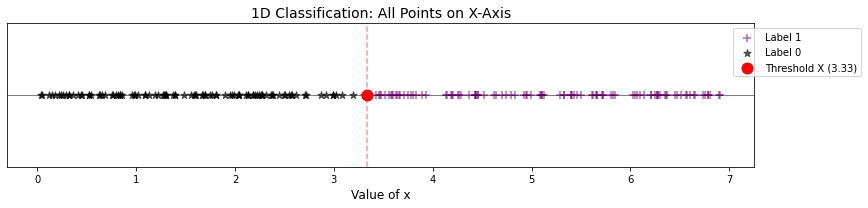

In [7]:
from scipy.optimize import minimize 
import numpy as np
import pandas as pd
import math
df=pd.read_csv("dataset0.csv")
x = df['x'].values
m = df['label'].values

def binary_cross_loss(params, x, m): 
    delta = 10**(-5)
    a,c = params 
    z=a*x+c
    m_hat=1/(1+np.exp(z))
    mse=-(m*np.log10(m_hat + delta)+(1-m)*np.log10(1-m_hat+delta))
    return np.mean(mse)

initial_guess = [0, 0] 
result_mse = minimize(binary_cross_loss, initial_guess, args=(x, m)) 
a,c = result_mse.x 


import matplotlib.pyplot as plt
import numpy as np

# --- 1. SETUP DATA ---
# X_point is the threshold (red dot)
X_point =- c / a 
y_label = m
# x contains your data values
# indices = np.arange(len(x)) # Not needed if plotting strictly on X-axis

plt.figure(figsize=(12, 3)) # Wide and short figure works best for 1D plots

# --- 2. PLOT CATEGORICAL DATA ON Y=0 ---
# Plot label 1 (Purple +) at y=0
plt.scatter(x[y_label == 1], np.zeros_like(x[y_label == 1]), 
            color="purple", marker="+", s=60, alpha=0.6, label='Label 1')

# Plot label 0 (Black *) at y=0
plt.scatter(x[y_label == 0], np.zeros_like(x[y_label == 0]), 
            color="black", marker="*", s=60, alpha=0.6, label='Label 0')

# --- 3. PLOT THRESHOLD POINT ---
plt.scatter(X_point, 0, color="red", s=120, zorder=5, label=f'Threshold X ({X_point:.2f})')

# Draw a vertical line to mark the decision boundary
plt.axvline(x=X_point, color='red', linestyle='--', alpha=0.4)

# --- 4. FORMATTING ---
plt.title('1D Classification: All Points on X-Axis', fontsize=14) 
plt.xlabel('Value of x', fontsize=12)

# Hide the Y-axis entirely since it contains no info
plt.gca().get_yaxis().set_visible(False)

# Optional: Add a subtle horizontal line for the axis
plt.axhline(y=0, color='black', linewidth=0.5, zorder=1)

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1)) 
plt.tight_layout()
plt.show()

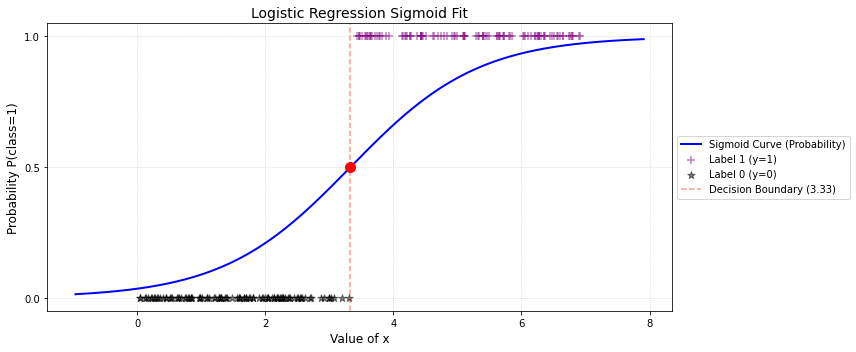

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 1. SETUP DATA
# X_point is your threshold (e.g., -3.24 from your image)
X_point = -c / a 

# 2. CREATE THE SIGMOID CURVE
# Generate 500 points for a smooth line
x_range = np.linspace(x.min() - 1, x.max() + 1, 500)
# Calculate z (the distance from the threshold)
z = x_range - X_point
# The Sigmoid formula: 1 / (1 + exp(-z))
sigmoid = 1 / (1 + np.exp(-z))

# 3. SETUP THE FIGURE
plt.figure(figsize=(12, 5))

# Plot the Sigmoid Curve
plt.plot(x_range, sigmoid, color='blue', linewidth=2, label='Sigmoid Curve (Probability)', zorder=2)

# 4. PLOT YOUR DATA ON THE X-AXIS
# We plot Label 1 at y=1 and Label 0 at y=0 to match the Sigmoid scale
plt.scatter(x[y_label == 1], np.ones_like(x[y_label == 1]), 
            color="purple", marker="+", s=60, alpha=0.5, label='Label 1 (y=1)')

plt.scatter(x[y_label == 0], np.zeros_like(x[y_label == 0]), 
            color="black", marker="*", s=60, alpha=0.5, label='Label 0 (y=0)')

# 5. MARK THE THRESHOLD
plt.axvline(x=X_point, color='red', linestyle='--', alpha=0.4, label=f'Decision Boundary ({X_point:.2f})')
plt.scatter(X_point, 0.5, color="red", s=100, zorder=5) # Mark the 0.5 probability point

# 6. FORMATTING
plt.title('Logistic Regression Sigmoid Fit', fontsize=14)
plt.xlabel('Value of x', fontsize=12)
plt.ylabel('Probability P(class=1)', fontsize=12)
plt.yticks([0, 0.5, 1]) # Focus on the key probability levels
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()